In [36]:
# 3rd party
import mysql.connector
import pandas as pd
import numpy as np
from fbprophet import Prophet

In [37]:
# get data for analysis
con = mysql.connector.connect(user='slaw', password='slaw123', database='call_center')
cursor = con.cursor()
cursor.execute("SELECT ds, no_calls FROM daily_calls ORDER BY ds ASC");
data = cursor.fetchall()
con.close()
df = pd.DataFrame(data, columns=['ds', 'y'])

In [45]:
# create model
model = Prophet()
model.add_seasonality(name='monthly', period=30.5, fourier_order=2)
model.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/slaw/my_py3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [46]:
future = model.make_future_dataframe(periods=56)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
234,2018-04-13,866.871976,797.934076,934.582130
235,2018-04-14,851.622176,779.363123,919.777996
236,2018-04-15,867.997928,796.142707,944.934237
237,2018-04-16,893.098862,823.383611,966.756948
238,2018-04-17,881.390867,810.384283,953.755135


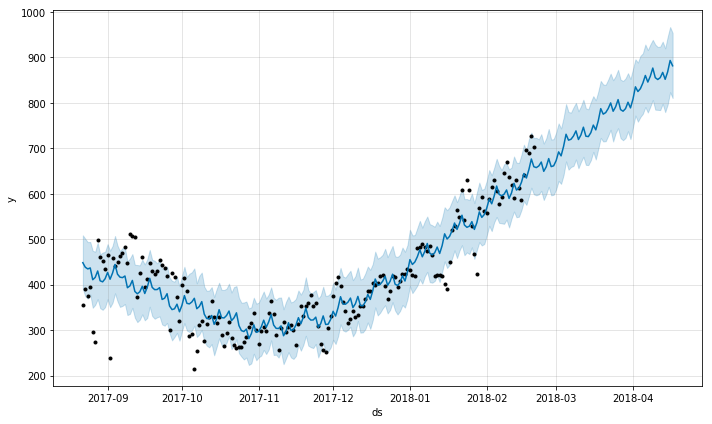

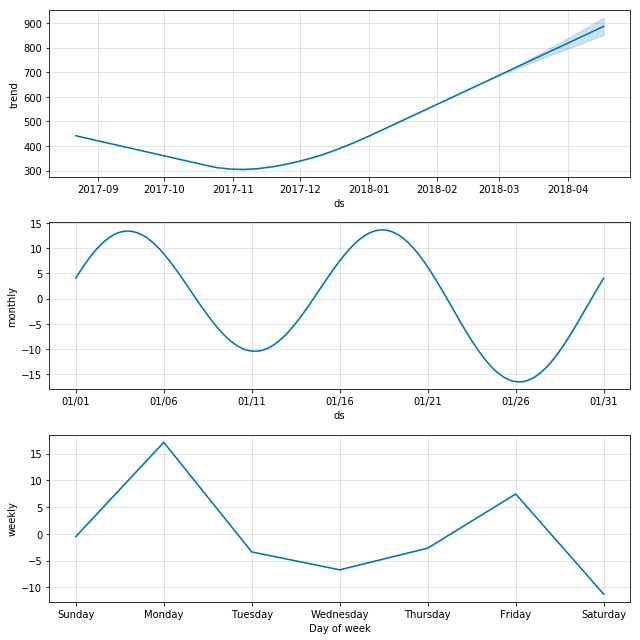

In [47]:
# plotting forcast and componentes
model.plot(forecast);
model.plot_components(forecast);